<h1 style="text-align: center;">CO2 Emission Prediction</h1>


<h1>Table of Contents</h1>

<h3>Understanding the Data</h3>

<h2>1. Data Cleaning, Processing, and Visualization</h2>
<ul>
    <li><h3>1.1 Data Cleaning</h3></li>
    <li><h3>1.2 Data Visualization</h3></li>
    <li><h3>1.3 Data Processing</h3></li>
</ul>

<h2>2. Descriptive Statistics</h2>

<h2>3. Linear Regression Model</h2>


### Importing Needed packages


In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
%matplotlib inline

<h2 id="data cleaning"> 1- data cleaning, processing and visualization </h2>

In [21]:
df = pd.read_csv(r"C:\Users\SoftLaptop\Downloads\FuelConsumptionCo2 (2).csv")



<h2 id="understanding_data">Understanding the Data</h2>

### FuelConsumption.csv:
We have downloaded a fuel consumption dataset, **FuelConsumption.csv**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## data cleaning

In [22]:
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features that we want to use for regression.


In [23]:
ldf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
ldf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,196
1,2.4,4,11.2,7.7,221
2,1.5,4,6.0,5.8,136
3,3.5,6,12.7,9.1,255
4,3.5,6,12.1,8.7,244
5,3.5,6,11.9,7.7,230
6,3.5,6,11.8,8.1,232
7,3.7,6,12.8,9.0,255
8,3.7,6,13.4,9.5,267


In [24]:
#cheking for duplicates in the data
ldf.duplicated().sum()

284

In [25]:
#cheking for missing values
ldf.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_HWY     0
CO2EMISSIONS            0
dtype: int64

no missing values in the data

In [26]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_CITY  1067 non-null   float64
 3   FUELCONSUMPTION_HWY   1067 non-null   float64
 4   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 41.8 KB


## Data visualization :

Text(0, 0.5, 'CO2 Emissions')

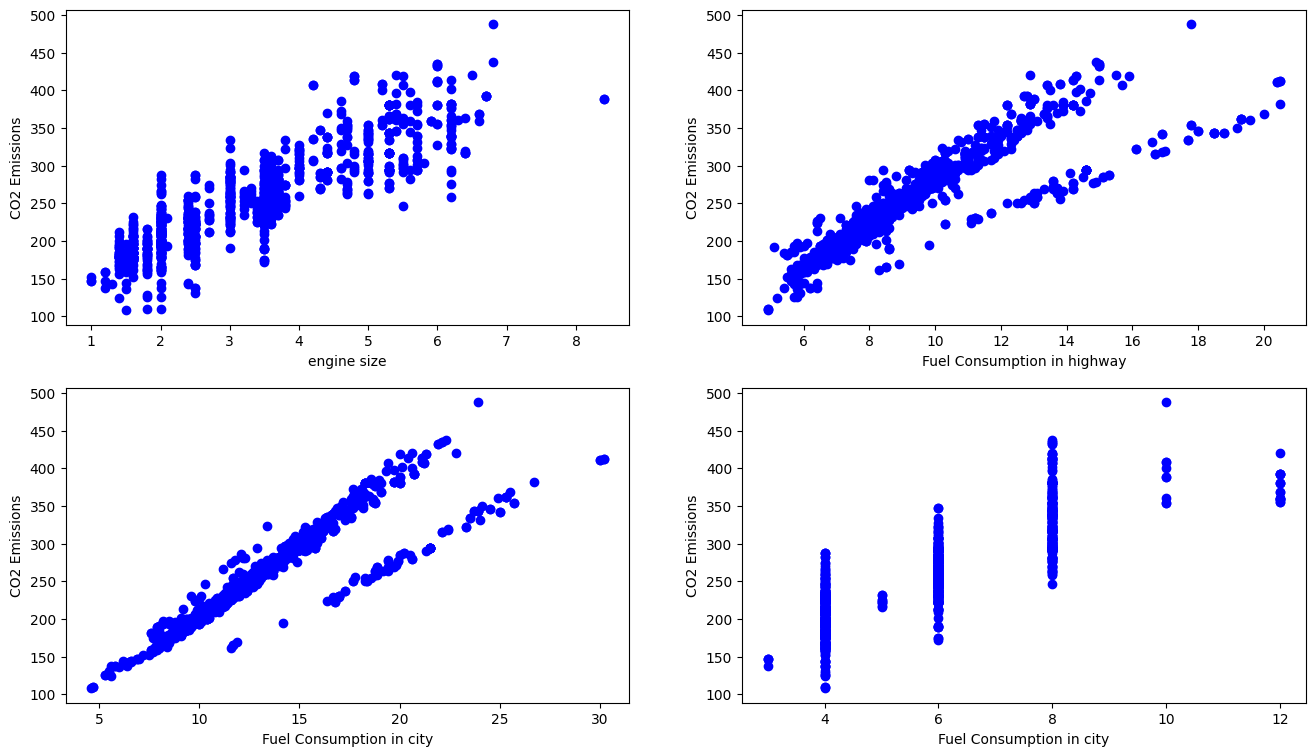

In [27]:
#scatter diagram between the CO2EMISSIONS (dependent variable) and the number of cylinders
fig, axs = plt.subplots(2, 2, figsize=(16, 9))
axs = axs.ravel()
axs[0].scatter(ldf['ENGINESIZE'], ldf['CO2EMISSIONS'], color='blue')
axs[0].set_xlabel("engine size")
axs[0].set_ylabel("CO2 Emissions")


axs[1].scatter(ldf['FUELCONSUMPTION_HWY'], ldf['CO2EMISSIONS'], color='blue')
axs[1].set_xlabel("Fuel Consumption in highway")
axs[1].set_ylabel("CO2 Emissions")


axs[2].scatter(ldf['FUELCONSUMPTION_CITY'], ldf['CO2EMISSIONS'], color='blue')
axs[2].set_xlabel("Fuel Consumption in city")
axs[2].set_ylabel("CO2 Emissions")


axs[3].scatter(ldf['CYLINDERS'], ldf['CO2EMISSIONS'], color='blue')
axs[3].set_xlabel("Fuel Consumption in city")
axs[3].set_ylabel("CO2 Emissions")




## Data proccesing :

### normalization :

In [39]:
# Normalization for the the float data
scaler = StandardScaler()
floats = ['ENGINESIZE','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']
scaled = scaler.fit(ldf[floats])
ldf.loc[:, floats] = scaler.transform(ldf[floats])
#setting min and max range from 0 to 1
min_max_scaler = MinMaxScaler()
ldf.loc[: ,floats] = min_max_scaler.fit_transform(ldf[floats])
ldf.head()



,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,0.135135,4,0.207031,0.115385,196
1,0.189189,4,0.257812,0.179487,221
2,0.067568,4,0.054688,0.057692,136
3,0.337838,6,0.316406,0.269231,255
4,0.337838,6,0.292969,0.243590,244


<h2 id="descriptive_statistics"> 2- descriptive statistics </h2>

In [40]:
ldf.ENGINESIZE.max()

1.0

In [41]:
#descriptive statistics after normalization
ldf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,0.317067,5.794752,0.339708,0.293244,256.228679
std,0.191337,1.797447,0.160205,0.179135,63.372304
min,0.000000,3.000000,0.000000,0.000000,108.000000
25%,0.135135,4.000000,0.220703,0.166667,207.000000
50%,0.324324,6.000000,0.312500,0.250000,251.000000
75%,0.445946,8.000000,0.427734,0.381410,294.000000
max,1.000000,12.000000,1.000000,1.000000,488.000000


### Box plot

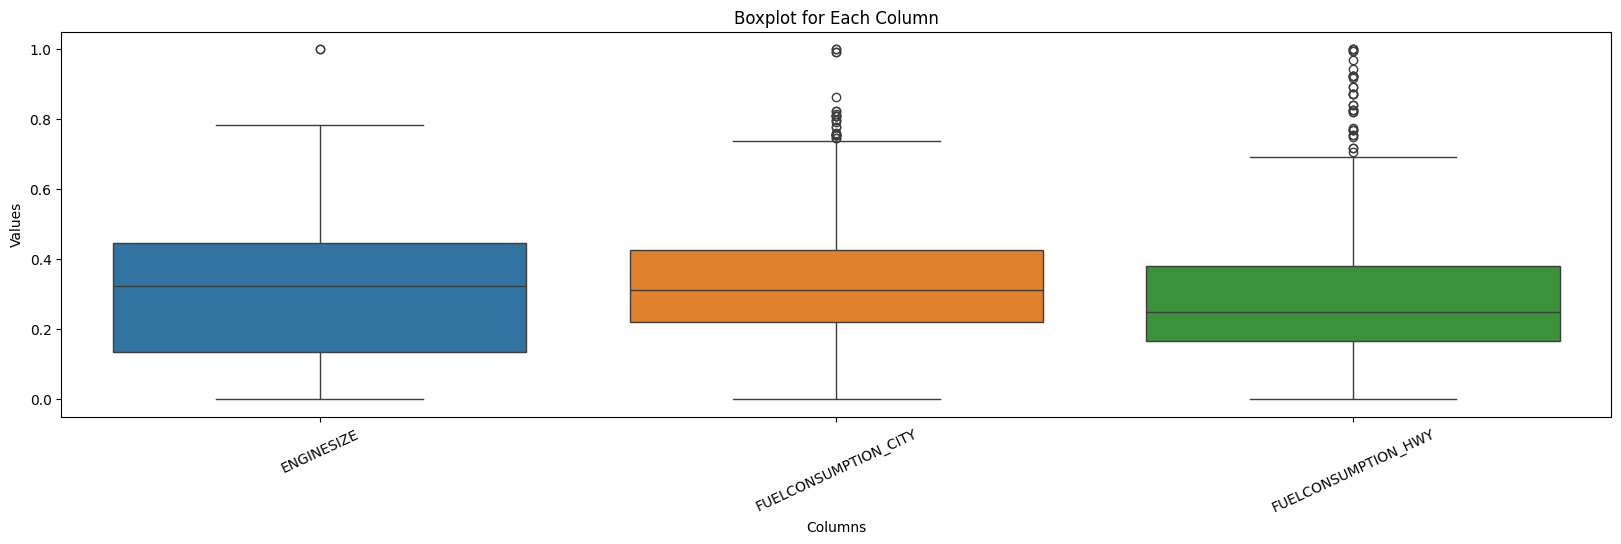

In [42]:
#box plot for the normalized columns as it helps to detect outliers
plt.figure(figsize=(20, 5))

sns.boxplot(data=ldf[floats])
plt.title('Boxplot for Each Column')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=25)

plt.show()

<h2 id="Linear Regression model"> 3- Linear regression model </h2>

### predicting the CO2 emission for cars as a dependent variable and the other features as independent variables

In [43]:
features = ldf.drop('CO2EMISSIONS',axis=1)
Y = ldf['CO2EMISSIONS']


#splitting the data for training and test data with ratio of 75% and 25% respectively
X_train , X_test , y_train , y_test = train_test_split(features, Y, test_size=0.25, random_state=30)

In [44]:
#intialization of a multiple linear regression model
lr = linear_model.LinearRegression()

#model training
lr.fit(X_train,y_train)

#making predictions
y_hat = lr.predict(X_test)

#model evaluation
MAE = mean_absolute_error(y_test, y_hat)
MSE = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print(f'Mean Absolute Error: {MAE}')
print(f'Mean Squared Error: {MSE}')
print(f'R-squared: {r2}')



Mean Absolute Error: 17.042498695280013
Mean Squared Error: 571.7131340487106
R-squared: 0.8645751550466596


### visualizing actual values VS predicted(y_hat) values

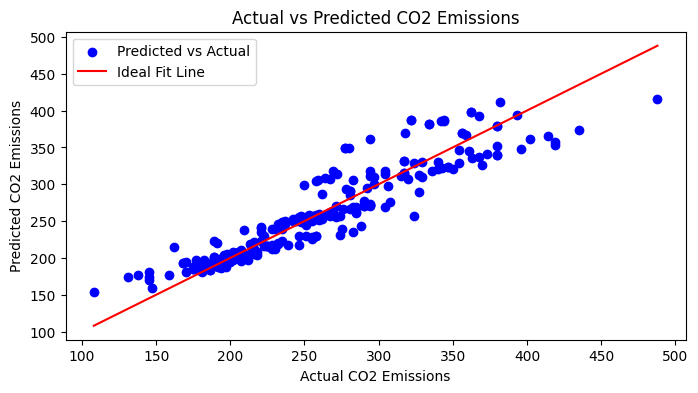

In [45]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_hat, color='blue', label='Predicted vs Actual')

#creating the ideal fit line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit Line')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
plt.show()